In [2]:
#Changing directory
import os
os.chdir("C:\\Study Material\\UTD studymaterial\\Applied Machine Learning\\Assignment_2")

In [81]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error,confusion_matrix, roc_curve,roc_auc_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [4]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None, obj_line=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), figsize = (10,6)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
               
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
        
    Citation
    --------
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    """
    from sklearn.model_selection import learning_curve
    import numpy as np
    from matplotlib import pyplot as plt
    
    plt.figure(figsize = figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")
    return plt


In [46]:
def plot_learning_curves_nimb(param, train_scores,test_scores,ylim=None, xlabel='paramater range',  obj_line=None,title='learning curve', figsize = (10,6)):
    """Plot training and test scores in relation to a parameter setting
    
        Citation
    --------
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
"""

    plt.figure(figsize = figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(xlabel)
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(param, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(param, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param, train_scores_mean, 'o-', color="r",
             label="Training score via CV")
    plt.plot(param, test_scores_mean, 'o-', color="g",
             label="Testing Score via CV")

    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")
    return plt

In [55]:
#importing dataset
Emp_df = pd.read_csv("C:\\Study Material\\UTD studymaterial\\Applied Machine Learning\\Assignment_2\\HR.csv")

In [56]:
Emp_df.columns = [x.lower() for x in Emp_df.columns]
Emp_df.shape
#Checking for the null values if any
Emp_df.isnull().any()

attrition                   False
age                         False
businesstravel              False
dailyrate                   False
department                  False
distancefromhome            False
education                   False
educationfield              False
employeecount               False
employeenumber              False
environmentsatisfaction     False
gender                      False
hourlyrate                  False
jobinvolvement              False
joblevel                    False
jobrole                     False
jobsatisfaction             False
maritalstatus               False
monthlyincome               False
monthlyrate                 False
numcompaniesworked          False
over18                      False
overtime                    False
percentsalaryhike           False
performancerating           False
relationshipsatisfaction    False
standardhours               False
stockoptionlevel            False
totalworkingyears           False
trainingtimesl

# Feature Engineering & Feature Exploration

For this study, I have chosen the IBM HR Analytics Employee Attrition and Performance Attrition dataset, which has been obtained from Kaggle. It is a fictional dataset created by IBM data scientists, which contains data related to employee performance measures and attrition. The dataset contains several predictor variables, having varying influence on the predicted variable Attrition which signifies whether an employee left the company or not.

A breakdown of the variables and their types is as follows: Predicted Variable: Attrition (Yes or No) Predictor Variables: 24 continuous variables, and 7 categorical variables

The dataset contains three columns, namely Employee Count, Over 18 and Standard Hours, which have the same values throughout the data. I removed these features from the dataset, since they do not provide any value to the prediction. Apart from this, the dataset is uniform throughout, and has no missing values or nulls for any of the columns.

In [22]:
#binary target conversion from yes/no to 1,0
Emp_df['attrition'] = np.where(Emp_df['attrition'] == 'Yes',1,0)

#Feature engineering
Emp_df.businesstravel.replace(to_replace=dict(zip(['Travel_Rarely', 'Travel_Frequently','Non-Travel'], ['tr','tf','nt'])), inplace=True)
Emp_df.department.replace(to_replace=dict(zip(['Sales', 'Research & Development','Human Resources'], ['s','rd','hr'])), inplace=True)
Emp_df.educationfield.replace(to_replace=dict(zip(['Life Sciences', 'Medical','Marketing', 'Other','Human Resources','Technical Degree'], ['ls','me','ma','o','hre','td'])), inplace=True)
Emp_df.gender.replace(['Male', 'Female'], [1, 0], inplace=True)
Emp_df.jobrole.replace(to_replace=dict(zip(['Healthcare Representative','Human Resources','Laboratory Technician','Manager','Manufacturing Director','Research Director','Research Scientist','Sales Executive','Sales Representative'],['here','hure','labtec','mangr','manu_dir','resear_dir','resear_sci','sales_exec','sales_rep'])), inplace=True)
Emp_df.maritalstatus.replace(to_replace=dict(zip(['Single','Married','Divorced'],['s','m','d'])), inplace=True)
Emp_df.overtime.replace(['Yes', 'No'], [1, 0], inplace=True)

#Dropping the columns with the same value throughout
del Emp_df['employeecount']
del Emp_df['over18']
del Emp_df['standardhours']

In [23]:
Emp_df.shape

(1470, 32)

In [25]:
#one hot encoding
Emp_df_final = pd.get_dummies(Emp_df, columns = ['businesstravel','department','educationfield','gender', 'jobrole','maritalstatus','overtime'],
                           drop_first=True)

In [29]:
Emp_df_final.shape

(1470, 46)

In [31]:
Emp_df_final

,attrition,age,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,jobrole_labtec,jobrole_mangr,jobrole_manu_dir,jobrole_resear_dir,jobrole_resear_sci,jobrole_sales_exec,jobrole_sales_rep,maritalstatus_m,maritalstatus_s,overtime_1
0,1,41,1102,1,2,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,0,49,279,8,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,1,37,1373,2,2,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,0,33,1392,3,4,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,0,27,591,2,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
5,0,32,1005,2,2,8,4,79,3,1,...,1,0,0,0,0,0,0,0,1,0
6,0,59,1324,3,3,10,3,81,4,1,...,1,0,0,0,0,0,0,1,0,1
7,0,30,1358,24,1,11,4,67,3,1,...,1,0,0,0,0,0,0,0,0,0
8,0,38,216,23,3,12,4,44,2,3,...,0,0,1,0,0,0,0,0,1,0
9,0,36,1299,27,3,13,3,94,3,2,...,0,0,0,0,0,0,0,1,0,0


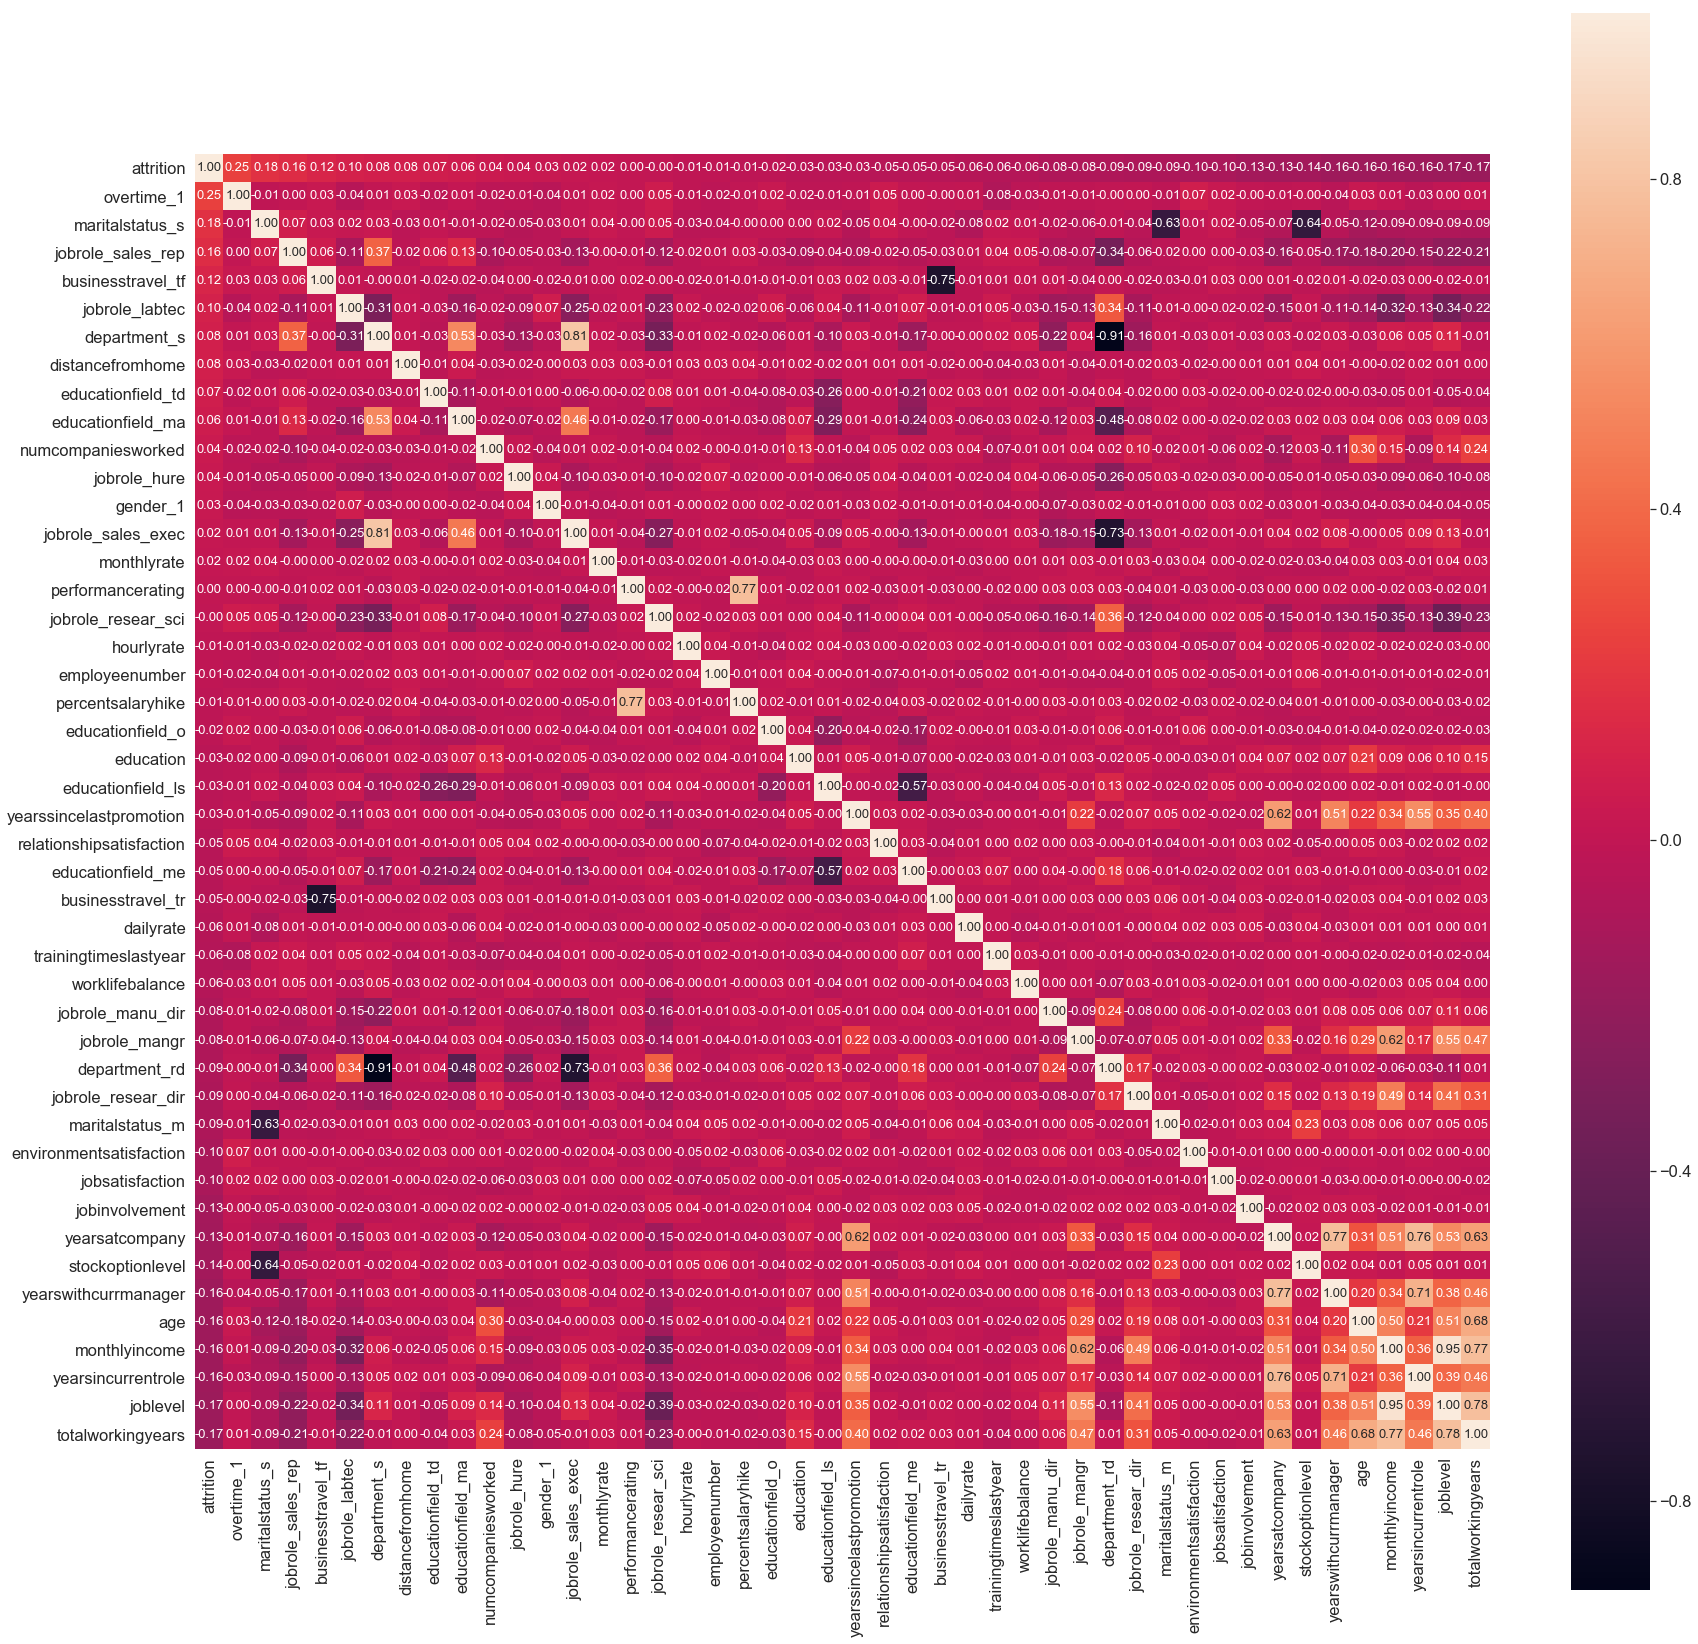

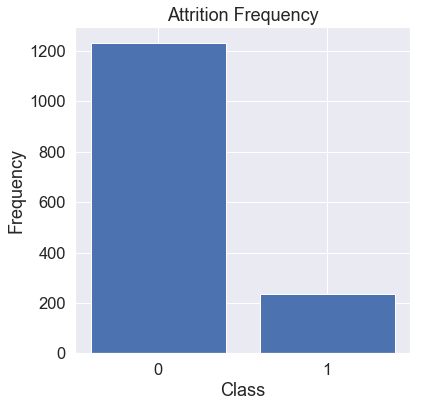

In [30]:
#Heatmap to show the correlation score

# Set up the matplotlib figure
corrmat = Emp_df_final.corr()
k = 46 #number of variables for heatmap
cols = corrmat.nlargest(k, 'attrition')['attrition'].index
cm = np.corrcoef(Emp_df_final[cols].values.T)
sns.set(font_scale=1.50)
plt.subplots(figsize=(29,29))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13},yticklabels=cols.values, xticklabels=cols.values)
plt.show()

unique, counts = np.unique(Emp_df_final.attrition, return_counts=True)
plt.figure(figsize = (6,6))
plt.bar(unique,counts)
plt.title('Attrition Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0,1], unique)
plt.show()

# FEATURE SCALING

In [32]:
#Splitting dataset into X and y 
X_Emp = Emp_df_final.iloc[:,1:].values
y_Emp = Emp_df_final.iloc[:,0].values

In [33]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
x_train_Emp, x_test_Emp, y_train_Emp, y_test_Emp = train_test_split(X_Emp, y_Emp, test_size = .30, random_state = 0)

from sklearn.preprocessing import StandardScaler
full_xscaler = StandardScaler().fit(x_train_Emp)
x_train_scaled_Emp = full_xscaler.transform(x_train_Emp)
x_test_scaled_Emp = full_xscaler.transform(x_test_Emp)


In [68]:
x_train_scaled_Emp.shape

(1029, 45)

PCA applied to reduce the no. of features in the dataset

In [34]:
pca = PCA(n_components=.90,random_state=123456)
x_train_scaled_pca_Emp = pca.fit_transform(x_train_scaled_Emp)
x_test_scaled_pca_Emp = pca.transform(x_test_scaled_Emp)
x_train_scaled_pca_Emp.shape

(1029, 29)

# IMPLEMENTING SUPPORT VECTOR MACHINES

1. SVC Parameters When Using RBF Kernel

    Gamma:
    Gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region. When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad. When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points. We will see this very clearly below.

    C:
    C is a parameter of the SVC learner and is the penalty for misclassifying a data point. When C is small, the classifier is okay with misclassified data points (high bias, low variance). When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance).

    Here in our implementation we will be experimenting with the values of gamma & C

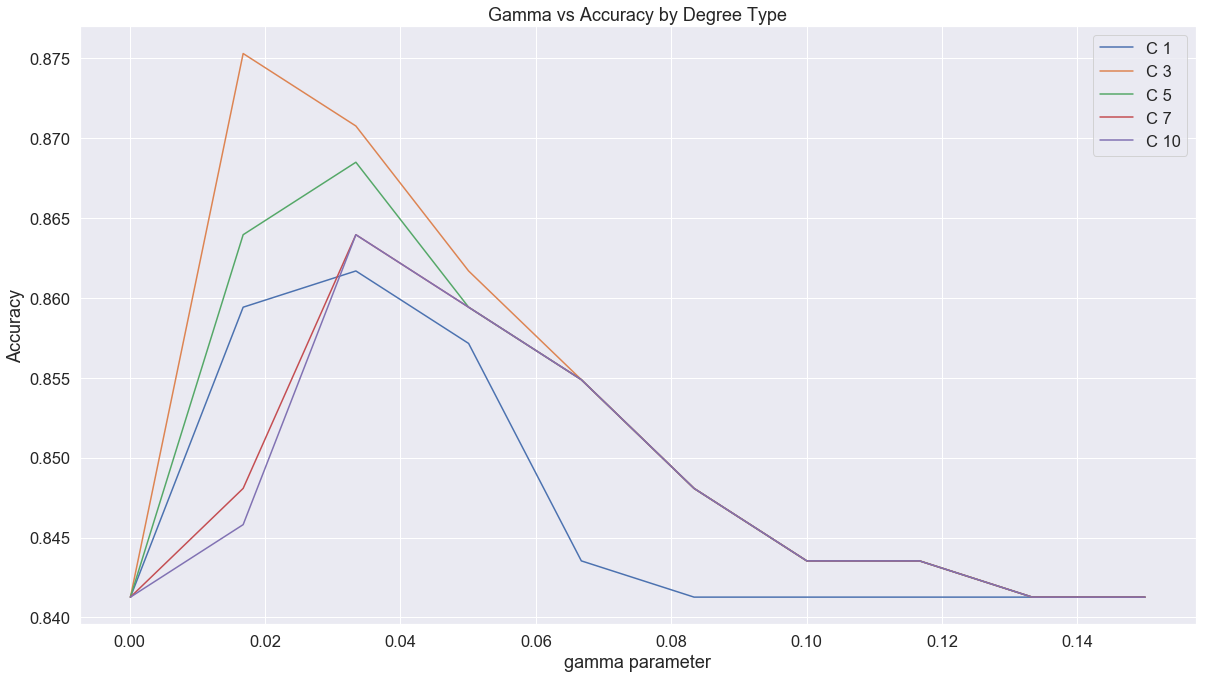

In [35]:
#grid_search_rbf = pd.DataFrame(columns = ['C', 'gamma', 'score','time', 'start_time'])
c_range = np.linspace(start = 1, stop = 10, num = 5)
gamma_range = np.linspace(start = .0001, stop = .15,num = 10)
plt.figure(figsize = (20,11))
for c in c_range:
    score_list = []
    for g in gamma_range:
        svmlr = svm.SVC(C = c, kernel = 'rbf', gamma = g)
        svmlr.fit(x_train_scaled_pca_Emp,y_train_Emp)
        score = svmlr.score(x_test_scaled_pca_Emp, y_test_Emp)
        score_list.append(score)
    plt.title('Gamma vs Accuracy by Degree Type')
    plt.plot(gamma_range,score_list, label = 'C %i' % c)
    plt.xlabel('gamma parameter')
    plt.ylabel('Accuracy')
    plt.legend()

PLOTTING GRAPH TO FIND THE OPTIMAL VALUE OF C CORRESPONDING TO THE GAMMA VALUE OF 0.015

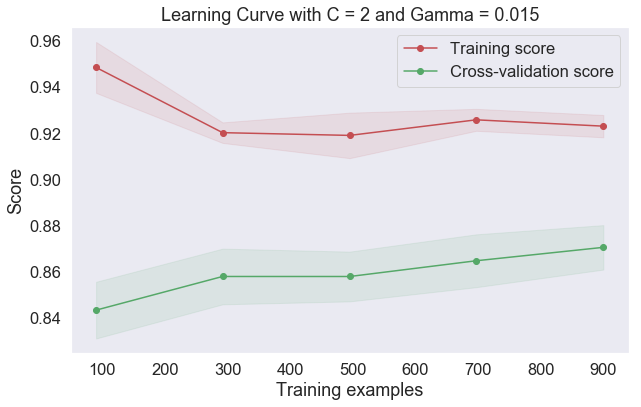

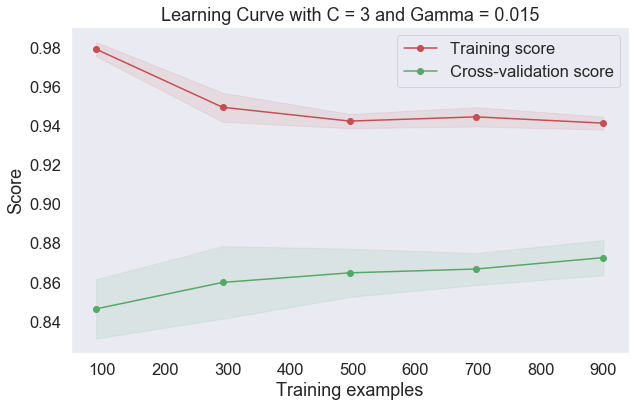

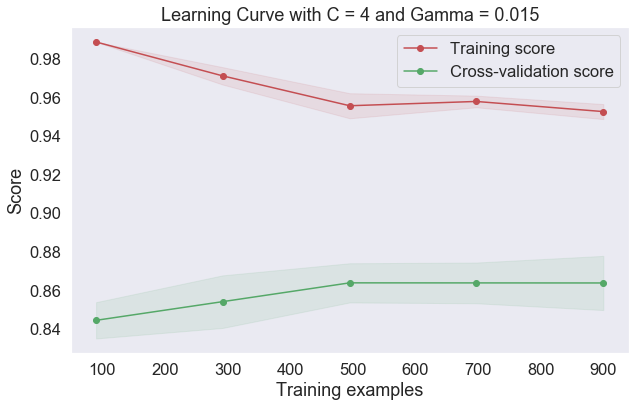

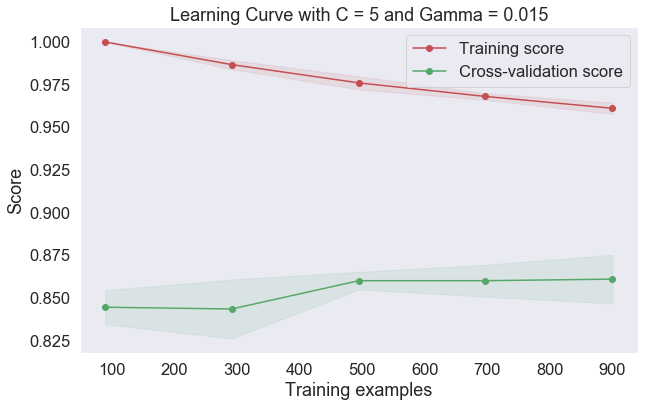

In [69]:
cv = 8
c_range = [2,3,4,5]

for i in c_range:
    svmlr = svm.SVC(C = i, kernel = 'rbf', gamma = .015)
    svmlr.fit(x_train_scaled_pca_Emp,y_train_Emp)
    plot_learning_curve(svmlr,title = f'Learning Curve with C = {i} and Gamma = 0.015',X= x_train_scaled_pca_Emp,y= y_train_Emp,cv = cv,n_jobs = -1)

2. SVM Using Polynomial Kernel

Plotting Accuracy as a function of Gamma parameter, C value and the degree value for the various polynomial kernels. Basically, trying to find the optimal value of Gamma

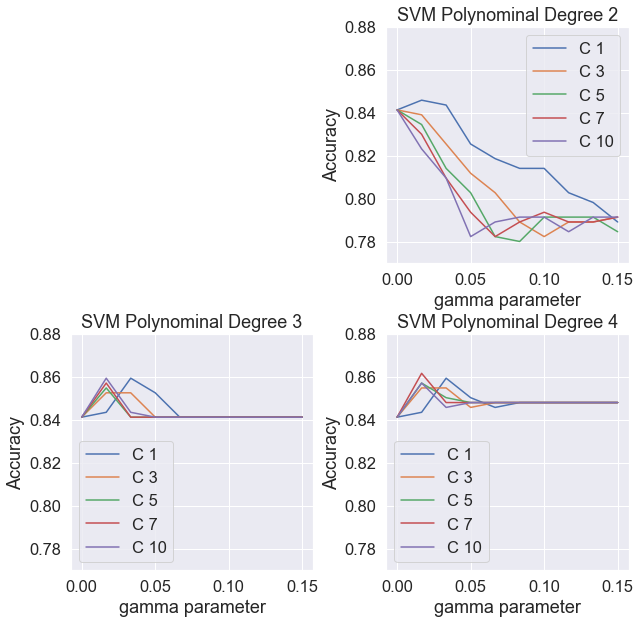

In [40]:
fig = plt.figure(figsize = (10,10))
fig.subplots_adjust(hspace=.3, wspace=.3)
c_range = np.linspace(start = 1, stop = 10, num = 5)
gamma_range = np.linspace(start = .0001, stop = .15,num = 10)
degree_list = [2,3,4]
for d in degree_list:
    ax = fig.add_subplot(2, 2,d)
    for c in c_range:
        score_list = []
        for g in gamma_range:
            svmpl = svm.SVC(C = c, kernel = 'poly',degree=d, gamma = g)
            svmpl.fit(x_train_scaled_pca_Emp,y_train_Emp)
            score = svmpl.score(x_test_scaled_pca_Emp, y_test_Emp)
            score_list.append(score)

        ax.set_title('SVM Polynominal Degree %i' % d)
        ax.plot(gamma_range,score_list, label = 'C %i' % c)
        ax.legend()
        ax.set_ylabel('Accuracy')
        ax.set_ylim(bottom =.77, top=0.88)
        ax.set_xlabel('gamma parameter')

Learning graph for Gamma 0.015, different degree and c = 7

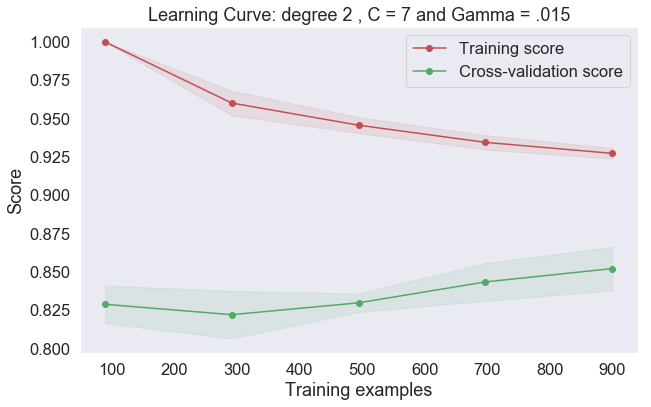

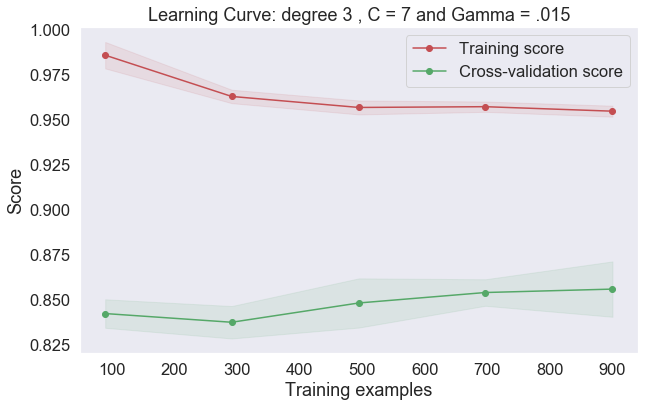

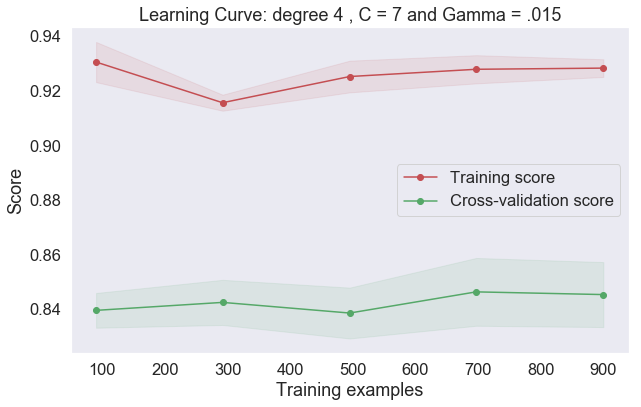

In [41]:
cv = 8
degree_list = [2,3,4]
for d in degree_list:
    svmpl = svm.SVC(C = 7, kernel = 'poly',degree=d, gamma= .015)
    svmpl.fit(x_train_scaled_pca_Emp,y_train_Emp)
    plot_learning_curve(svmpl,title = f'Learning Curve: degree {d} , C = 7 and Gamma = .015',X= x_train_scaled_pca_Emp,y= y_train_Emp,cv = 8,n_jobs = -1)

3. SVM using Linear Kernel

Finding the optimal value of C as a function of no. of observations

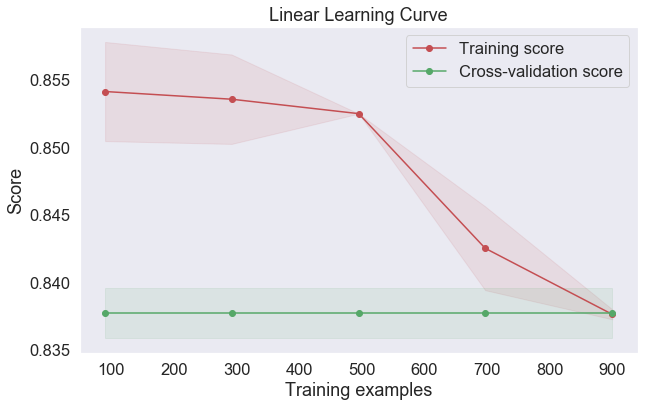

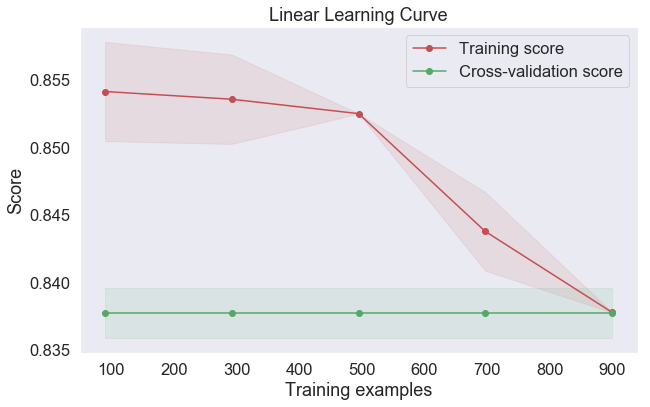

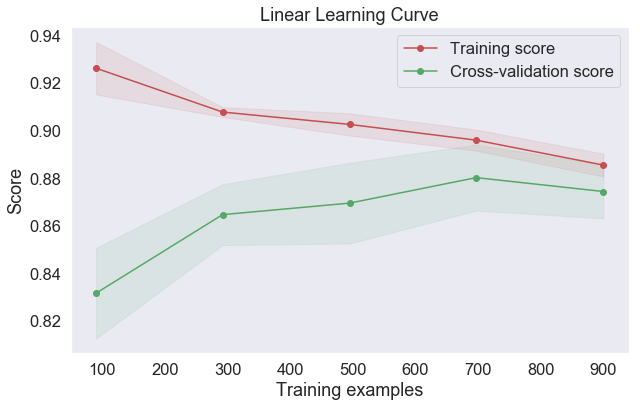

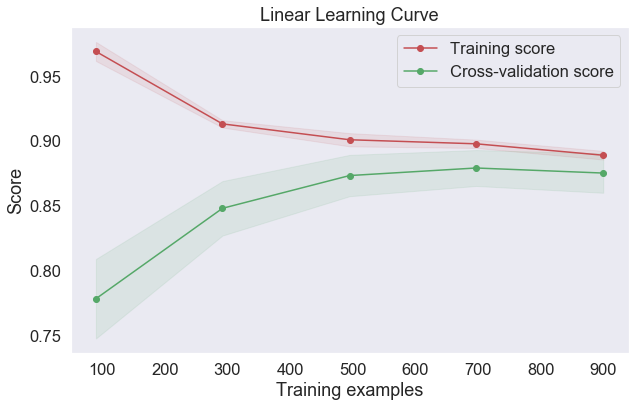

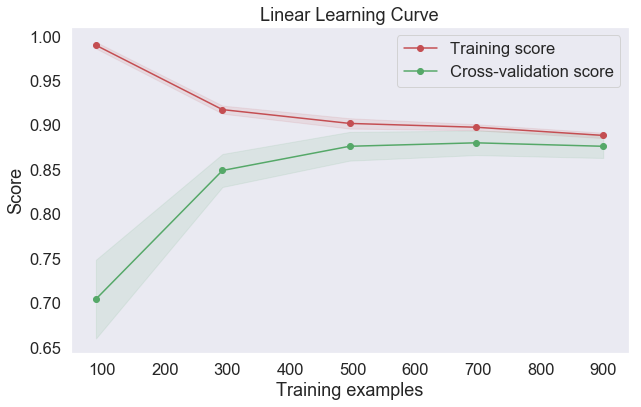

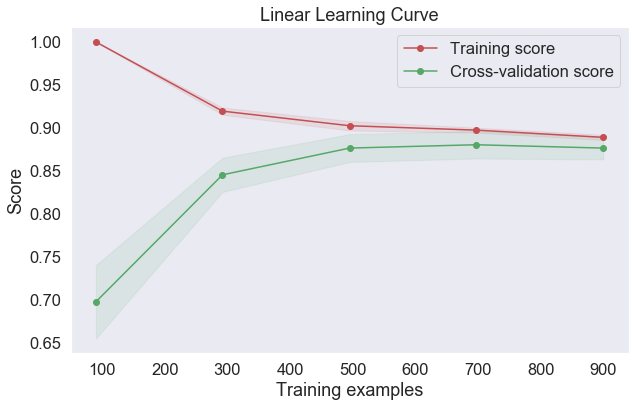

In [42]:
cv = 8
C_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

for c in C_range:
    svmlr = svm.SVC(C = c, kernel = 'linear')
    svmlr.fit(x_train_scaled_pca_Emp,y_train_Emp)
    plot_learning_curve(svmlr,title = f'Linear Learning Curve',X= x_train_scaled_pca_Emp,y= y_train_Emp,cv = 8,n_jobs = -1)
    

Plotting the learning curve with respect to C for the training and validation set, to get the best value of c

<module 'matplotlib.pyplot' from 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

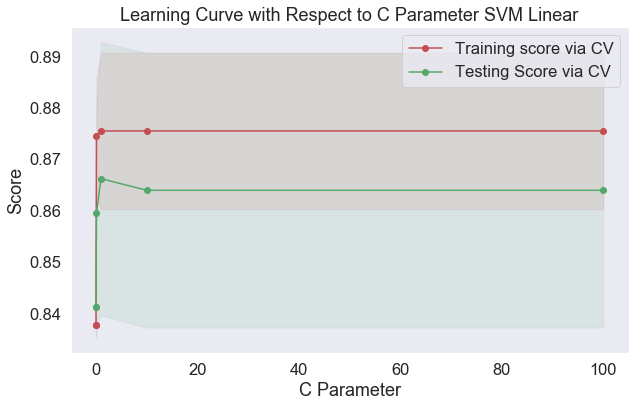

In [47]:
cv = 8
C_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_accuracy = []
test_accuracy = []
score = []    

for c in C_range:
    svmlr = svm.SVC(C = c, kernel = 'linear')
    svmlr.fit(x_train_scaled_pca_Emp,y_train_Emp)
    score.append(svmlr.score(x_test_scaled_pca_Emp,y_test_Emp))
    train_accuracy.append(cross_val_score(svmlr,x_train_scaled_pca_Emp,y_train_Emp,cv = cv, n_jobs = -1))
    test_accuracy.append(cross_val_score(svmlr,x_test_scaled_pca_Emp,y_test_Emp,cv = cv, n_jobs = -1))
plot_learning_curves_nimb(C_range, train_accuracy, test_accuracy, xlabel='C Parameter', title = 'Learning Curve with Respect to C Parameter SVM Linear')

Plotting the learing curve for the C values 0.001, 0.01 & 0.1 over the training and validation set to get a closer look as to which parameter provides the better bias/variance tradeoff

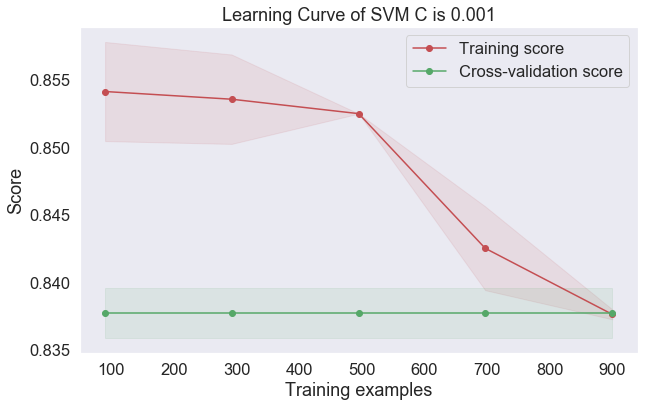

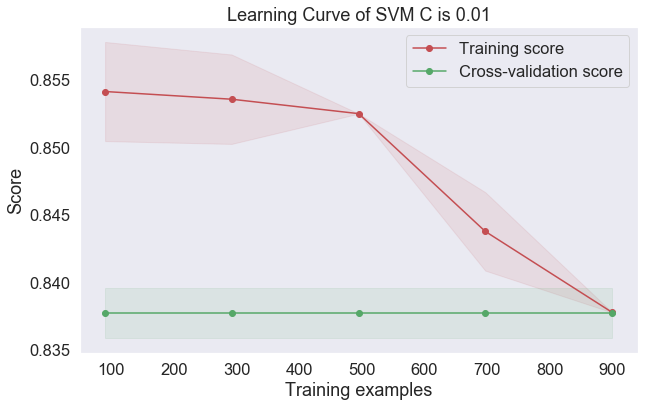

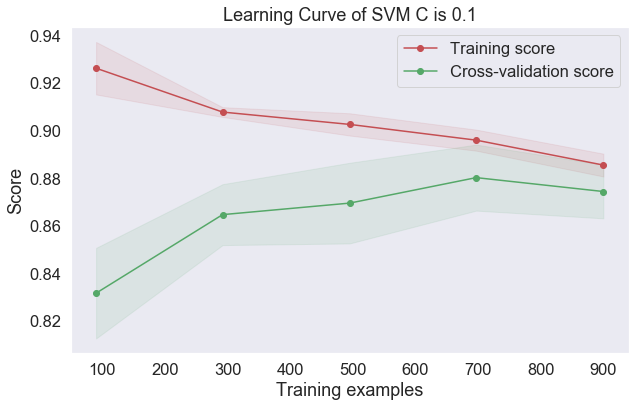

In [73]:
cv = 8
c_range = [0.001, 0.01, 0.1]

for i in c_range:
    svmlr = svm.SVC(C = i, kernel = 'linear')
    svmlr.fit(x_train_scaled_pca_Emp,y_train_Emp)
    plot_learning_curve(svmlr,'Learning Curve of SVM C is %s' %i ,x_train_scaled_pca_Emp, y_train_Emp,cv = cv,n_jobs=-1)

# DECISION TREES

1. Selecting the appropriate depth of the tree in order to implement pruning

<module 'matplotlib.pyplot' from 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

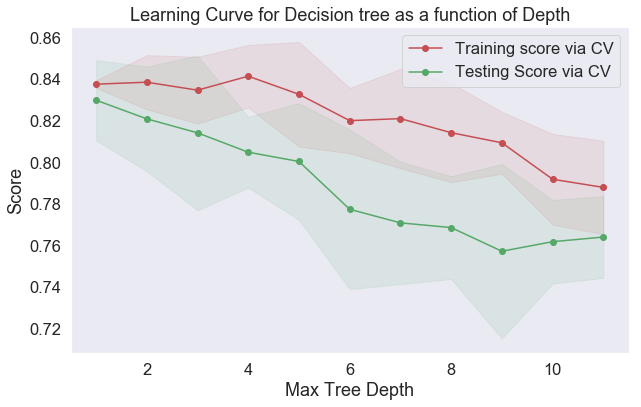

In [49]:
cv = 8
depth_range = range(1,12)
train_accuracy = []
test_accuracy = []
for i in depth_range:
    tree1 = tree.DecisionTreeClassifier(max_depth=i)
    tree1.fit(x_train_scaled_pca_Emp,y_train_Emp)
    train_accuracy.append(cross_val_score(tree1,x_train_scaled_pca_Emp,y_train_Emp,cv = cv, n_jobs = -1))
    test_accuracy.append(cross_val_score(tree1,x_test_scaled_pca_Emp,y_test_Emp,cv = cv, n_jobs = -1))
plot_learning_curves_nimb(depth_range, train_accuracy, test_accuracy, title=f'Learning Curve for Decision tree as a function of Depth', xlabel='Max Tree Depth')

2. Finding the optimal no. of features to be used

<module 'matplotlib.pyplot' from 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

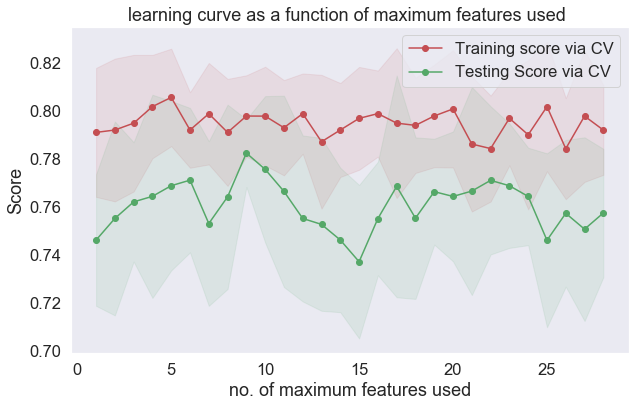

In [57]:
cv = 8
no_of_column = x_train_scaled_pca_Emp.shape[1]
feature_range = range(1, no_of_column)
train_accuracy = []
test_accuracy = []

for i in feature_range:
    tree2 = tree.DecisionTreeClassifier(max_depth=2,max_features=i)
    tree2.fit(x_train_scaled_pca_Emp,y_train_Emp)
    train_accuracy.append(cross_val_score(tree1,x_train_scaled_pca_Emp,y_train_Emp,cv = cv, n_jobs = -1))
    test_accuracy.append(cross_val_score(tree1,x_test_scaled_pca_Emp,y_test_Emp,cv = cv, n_jobs = -1))

plot_learning_curves_nimb(feature_range, train_accuracy, test_accuracy,xlabel='no. of maximum features used', title= 'learning curve as a function of maximum features used ')


Plotting the decision tree with the best depth value and optimal no. of features along with CV value as 8

<module 'matplotlib.pyplot' from 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

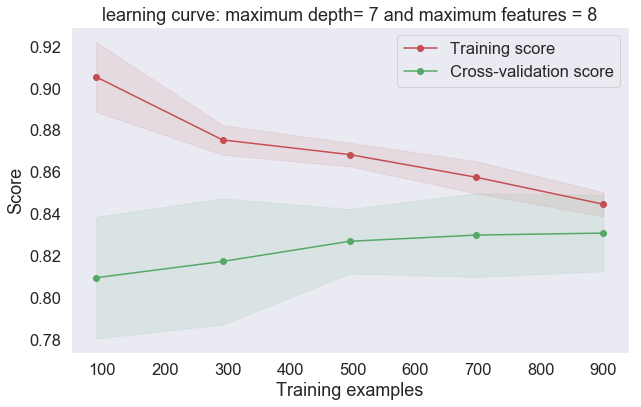

In [59]:
final_tree = tree.DecisionTreeClassifier(max_depth=2, max_features=10)
plot_learning_curve(final_tree,'learning curve: maximum depth= 7 and maximum features = 8',x_train_scaled_pca_Emp,y_train_Emp,cv = 8, n_jobs=-1)

Showing the Gini and Entropy plot for the impurity to select which one maximizes the classification accuracy. Entropy preferred as it provides higher accuracy value

Text(0, 0.5, 'Accuracy')

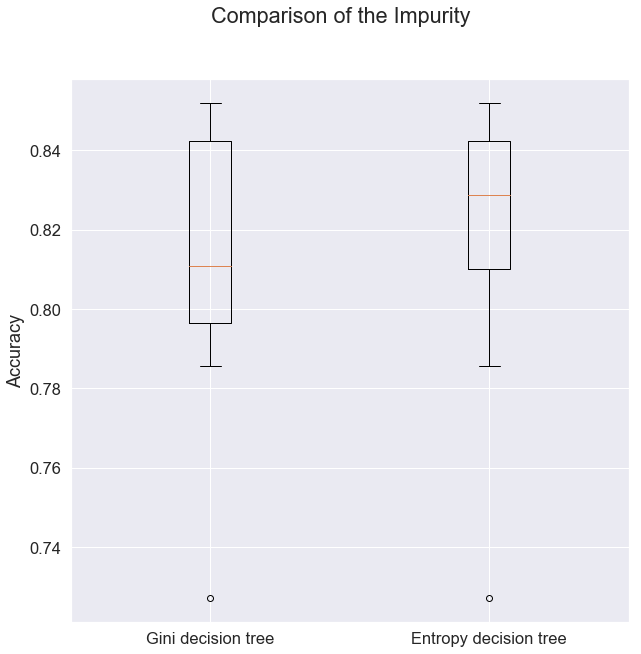

In [75]:
tree_ = []
cv = 8
#gini
tree_g = tree.DecisionTreeClassifier(max_depth=3,criterion='gini')
tree_g.fit(x_train_scaled_pca_Emp,y_train_Emp)
tree_.append(cross_val_score(tree_g,  x_test_scaled_pca_Emp,y_test_Emp,cv=cv, scoring='accuracy'))

#entropy
tree_e = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')
tree_e.fit(x_train_scaled_pca_Emp,y_train_Emp)
tree_.append(cross_val_score(tree_e, x_test_scaled_pca_Emp,y_test_Emp,cv=cv, scoring='accuracy'))

#Plot the best results
classes = ['Gini decision tree','Entropy decision tree']
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison of the Impurity')
ax = fig.add_subplot(111)
plt.boxplot(tree_)
ax.set_xticklabels(classes)
ax.set_ylabel('Accuracy')

# BOOSTING(ADABOOST)

Experimenting to find the optimal value of estimators to be used for boosting

<module 'matplotlib.pyplot' from 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

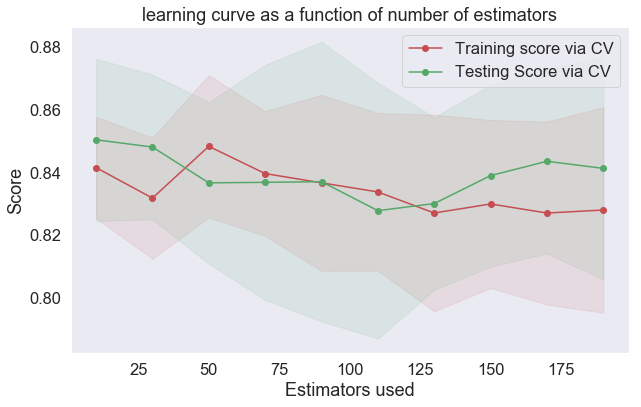

In [60]:
cv = 8
estimator_range = range(10,200,20)
train_accuracy = []
test_accuracy = []

for i in (estimator_range):
    ada_boost = AdaBoostClassifier(n_estimators=i)
    ada_boost.fit(x_train_scaled_pca_Emp,y_train_Emp)
    train_accuracy.append(cross_val_score(ada_boost,x_train_scaled_pca_Emp,y_train_Emp,cv = cv, n_jobs = -1))
    test_accuracy.append(cross_val_score(ada_boost,x_test_scaled_pca_Emp,y_test_Emp,cv = cv, n_jobs = -1))
plot_learning_curves_nimb(estimator_range, train_accuracy, test_accuracy ,xlabel='Estimators used', title= 'learning curve as a function of number of estimators')

Plot to show the learning curves for various values of estimators showing optimal behaviour for the accuracy calculation in boosting

Accuracy: 0.8435374149659864


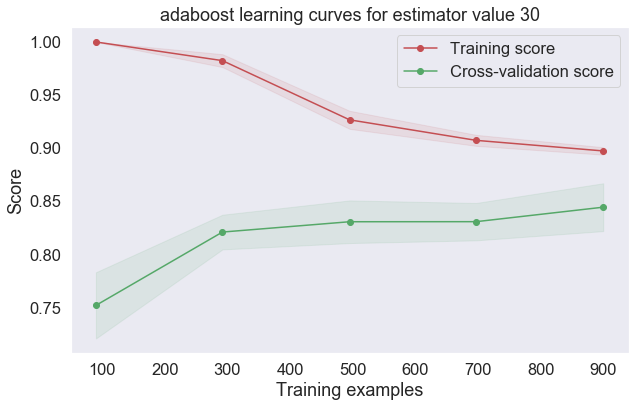

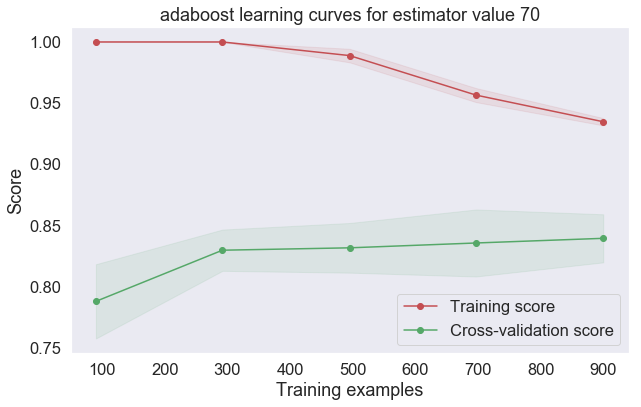

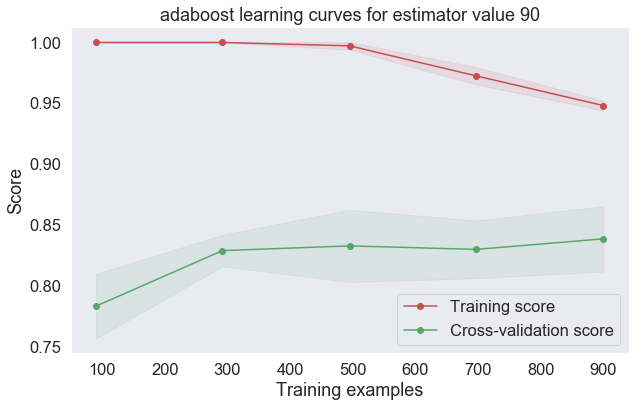

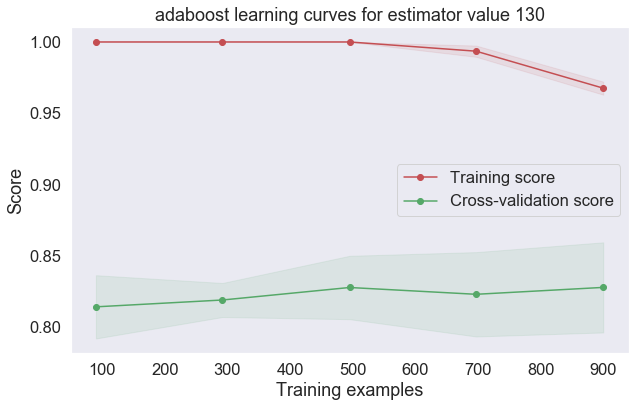

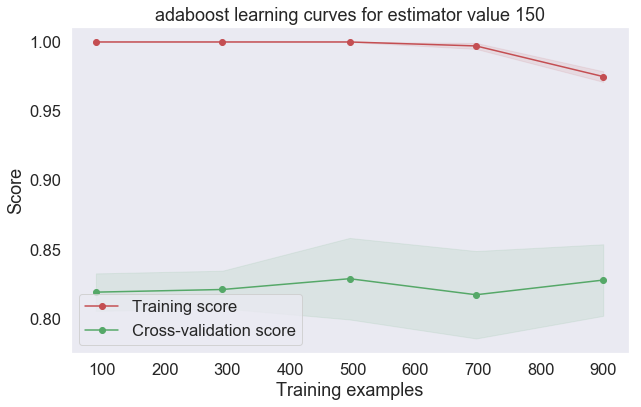

In [62]:
cv = 8
estimator_list = [30, 70, 90, 130,150]
for i in estimator_list:
    ada_boost2 = AdaBoostClassifier(n_estimators=i)
    ada_boost2.fit(x_train_scaled_pca_Emp,y_train_Emp)
    plot_learning_curve(ada_boost2,f'adaboost learning curves for estimator value {i}', x_train_scaled_pca_Emp,y_train_Emp, cv = cv, n_jobs = -1)

y_pred = ada_boost2.predict(x_test_scaled_pca_Emp)
print("Accuracy:",metrics.accuracy_score(y_test_Emp, y_pred))

# COMPARING ALL THE METHODS

1. Plotting the ROC curve

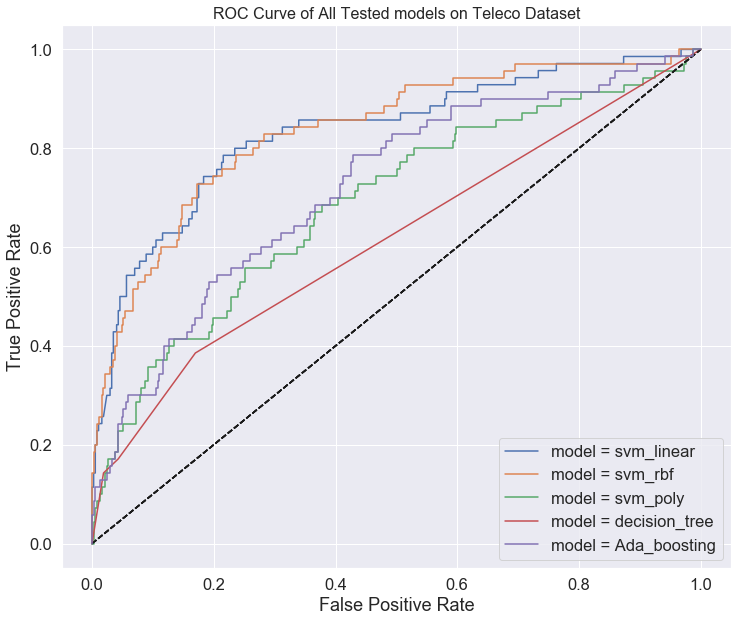

In [70]:
cv =8

#SVM with Linear Kernel
svmlr = svm.SVC(C = 0.1, kernel = 'linear', probability=True)
svmlr.fit(x_train_scaled_pca_Emp,y_train_Emp)

#SVM with RBF Kernel
svmrbf = svm.SVC(C = 2, kernel = 'rbf', gamma = .0149, probability=True)
svmrbf.fit(x_train_scaled_pca_Emp,y_train_Emp)

#SVM with Poly Kernel
svmpl = svm.SVC(C = 7, kernel = 'poly',degree=2, gamma = 0.015, probability=True)
svmpl.fit(x_train_scaled_pca_Emp,y_train_Emp)

#Decision tree with optimum depth value
deci_tree = tree.DecisionTreeClassifier(max_depth=2)
deci_tree.fit(x_train_scaled_pca_Emp,y_train_Emp)

#Boosted Tree with optimum estimator value
ada_boost = AdaBoostClassifier(n_estimators=30)
ada_boost.fit(x_train_scaled_pca_Emp,y_train_Emp)



#Plotting ROC Curve
models = {'svm_linear': svmlr, 'svm_rbf': svmrbf,'svm_poly':svmpl, 'decision_tree':deci_tree, 'Ada_boosting':ada_boost}
plt.figure(figsize = (12,10))
for i, model in models.items():
    scores = model.predict_proba(x_test_scaled_pca_Emp)[:,1]
    #rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
    fpr, tpr, threshold = roc_curve(y_test_Emp, scores, pos_label = 1)
    plt.title('ROC Curve of All Tested models on Teleco Dataset', fontsize = 16)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr, tpr, label = f'model = {i}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    fpr,tpr

2. Calculating the roc_auc_score for all the models

In [71]:
models = {'svm_linear': svmlr, 'svm_rbf': svmrbf,'svm_poly':svmpl, 'decision_tree':deci_tree, 'Ada_boosting':ada_boost}
for i, model in models.items():
    auc_score = roc_auc_score(y_test_Emp, model.predict_proba(x_test_scaled_pca_Emp)[:,1])
    print(f'{i} auc score is {auc_score}')

svm_linear auc score is 0.8330381209087409
svm_rbf auc score is 0.8365036580670003
svm_poly auc score is 0.6892568348093955
decision_tree auc score is 0.6156526761648056
Ada_boosting auc score is 0.7216403542549095


In [82]:
cv =8

#SVM with Linear Kernel
svmlr = svm.SVC(C = 0.1, kernel = 'linear', probability=True)
svmlr = svmlr.fit(x_train_scaled_pca_Emp,y_train_Emp)

#SVM with RBF Kernel
svmrbf = svm.SVC(C = 2, kernel = 'rbf', gamma = .0149, probability=True)
svmrbf = svmrbf.fit(x_train_scaled_pca_Emp,y_train_Emp)

#SVM with Poly Kernel
svmpl = svm.SVC(C = 7, kernel = 'poly',degree=2, gamma = 0.015, probability=True)
svmpl = svmpl.fit(x_train_scaled_pca_Emp,y_train_Emp)

#Decision tree with optimum depth value
deci_tree = tree.DecisionTreeClassifier(max_depth=2)
deci_tree = deci_tree.fit(x_train_scaled_pca_Emp,y_train_Emp)

#Boosted Tree with optimum estimator value
ada_boost = AdaBoostClassifier(n_estimators=30)
ada_boost = ada_boost.fit(x_train_scaled_pca_Emp,y_train_Emp)

pred_out_linear_svm_train = svmlr.predict(x_train_scaled_pca_Emp)
pred_out_linear_svm_test = svmlr.predict(x_test_scaled_pca_Emp)
print("Accuracy Score for svm linear best model for train set:", accuracy_score(y_train_Emp, pred_out_linear_svm_train))
print("Accuracy Score for svm linear best model for test set:",accuracy_score(y_test_Emp, pred_out_linear_svm_test))

pred_out_svmrbf_train = svmrbf.predict(x_train_scaled_pca_Emp)
pred_out_svmrbf_test = svmrbf.predict(x_test_scaled_pca_Emp)
print("Accuracy Score for svm rbf best model for train set:", accuracy_score(y_train_Emp, pred_out_svmrbf_train))
print("Accuracy Score for svm rbf best model for test set:",accuracy_score(y_test_Emp, pred_out_svmrbf_test))

pred_out_svmpl_train = svmpl.predict(x_train_scaled_pca_Emp)
pred_out_svmpl_test = svmpl.predict(x_test_scaled_pca_Emp)
print("Accuracy Score for svm poly best model for train set:", accuracy_score(y_train_Emp, pred_out_svmpl_train))
print("Accuracy Score for svm poly best model for test set:",accuracy_score(y_test_Emp, pred_out_svmpl_test))

pred_out_deci_tree_train = deci_tree.predict(x_train_scaled_pca_Emp)
pred_out_deci_tree_test = deci_tree.predict(x_test_scaled_pca_Emp)
print("Accuracy Score for deci_tree best model for train set:", accuracy_score(y_train_Emp, pred_out_deci_tree_train))
print("Accuracy Score for deci_tree best model for test set:",accuracy_score(y_test_Emp, pred_out_deci_tree_test))

pred_out_ada_boost_train = ada_boost.predict(x_train_scaled_pca_Emp)
pred_out_ada_boost_test = ada_boost.predict(x_test_scaled_pca_Emp)
print("Accuracy Score for ada_boost best model for train set:", accuracy_score(y_train_Emp, pred_out_ada_boost_train))
print("Accuracy Score for ada_boost best model for test set:",accuracy_score(y_test_Emp, pred_out_ada_boost_test))


Accuracy Score for svm linear best model for train set: 0.8862973760932945
Accuracy Score for svm linear best model for test set: 0.8662131519274376
Accuracy Score for svm rbf best model for train set: 0.9280855199222546
Accuracy Score for svm rbf best model for test set: 0.8707482993197279
Accuracy Score for svm poly best model for train set: 0.9212827988338192
Accuracy Score for svm poly best model for test set: 0.8367346938775511
Accuracy Score for deci_tree best model for train set: 0.8551992225461613
Accuracy Score for deci_tree best model for test set: 0.8321995464852607
Accuracy Score for ada_boost best model for train set: 0.892128279883382
Accuracy Score for ada_boost best model for test set: 0.8367346938775511
